#**ATIVIDADE**: LISTA 2 - PYTHON

*ALUNO: Pâmela Guimarães da Costa | RA: 92981*

Instituto de Ciência e Tecnologia - UNIFESP
UC: processamento de sinais.
2o semestre de 2021
Professor: Thiago Martini Pereira

<h5>Transformada de Fourier e correlação.</h5>

1) Crie um sinal composto pela soma de três cossenoides (cosseno) de frequências
distintas (45 Hz, 60 Hz e 92 Hz) cada um com uma amplitude característica (2, 5
e 10). Faça a transformada de Fourier desse sinal e plote a parte real, imaginaria
e sua magnitude e espectro de energia. A duração do sinal é de 5 segundos e fs
= 500 Hz.

*Observações complementares: não precisa entregar a parte que solicita fazer o calculo do espectro de energia.*

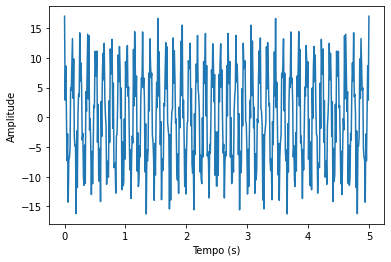

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#Parâmetros
fs = 500
tinicial = 0
tfinal = 5

#tempo
t = np.linspace(tinicial, tfinal, fs)

# três cossenoides (cosseno)
s1 = 2 * np.cos(45 * 2 * np.pi * t) 
s2 = 5 * np.cos(60 * 2 * np.pi * t) 
s3 = 10 * np.cos(92 * 2 * np.pi * t) 

#sinal resultante
s = s1 + s2 + s3

#plot
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.plot(t, s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

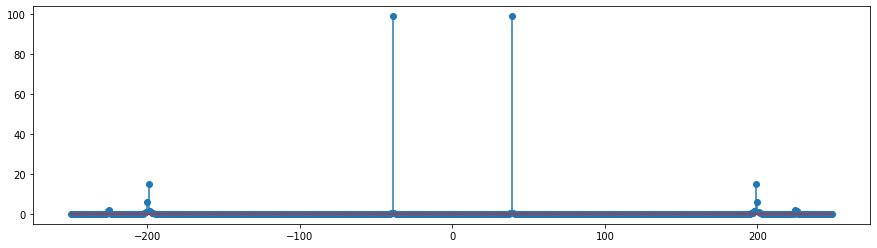

In [4]:
yfft = np.fft.fftshift(np.fft.fft(s))
freq = np.arange(0,fs,fs/yfft.shape[0])-fs/2
plt.figure(figsize=(15,4))
plt.stem(freq,(2*np.abs(yfft)/yfft.shape[0])**2)

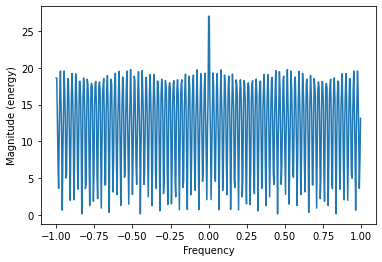

In [5]:
plt.magnitude_spectrum(yfft) 
plt.show() 

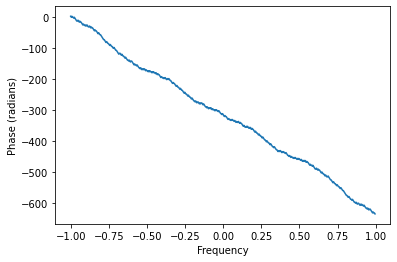

In [6]:
plt.phase_spectrum(yfft)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

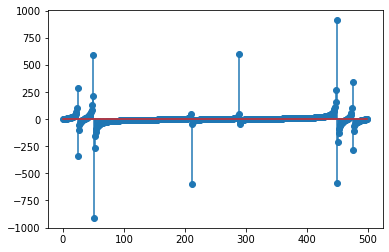

In [7]:
plt.stem(np.imag(yfft))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

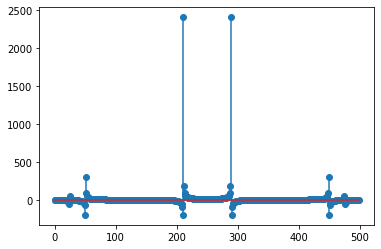

In [8]:
plt.stem(np.real(yfft))

---

2) Crie um sinal senoidal composto da soma das seguintes funções x1 e x2 . O sinal é corrompido por um ruído aleatório (N(t)) (função randn do numpy). Considere que o sinal é amostrado na frequência de 1000 Hz. A duração do sinal é de 7 segundos.

X1 = 0.7 ∗ sen(2π65t)
X2 = 2 ∗ sen(2π125t + 0,5 ∗ π)
N(t) = 0.5 ∗ randn(size(t))

a. Determine a FFT do sinal corrompido e esboce a sua magnitude e espectro de
energia.

*Observações complementares: não precisa entregar a parte que solicita fazer o calculo do espectro de energia.*

In [13]:
plt.rcParams['figure.figsize'] = [20,12]
plt.rcParams.update({'font.size': 12})
plt.style.use('seaborn')

dt = 0.001
fs = 1000
tinicial2 = 0
tfinal2 = 7
t = np.linspace(tinicial2, tfinal2, fs)
signal = 0.7 * np.sin(2 * np.pi * 65 * t) + 2 * np.sin(2 * np.pi * 125 * t + 0.5 * np.pi) #composite signal
signal_clean = signal 
signal = signal + 0.5 * np.random.randn(len(t))
minsignal, maxsignal = signal.min(), signal.max()

In [14]:
n = len(t)
fhat = np.fft.fft(signal, n) 
psd = fhat * np.conj(fhat)/n
freq = (1/(dt*n)) * np.arange(n) 
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32)

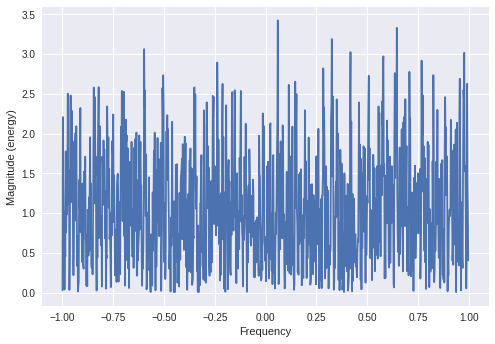

In [15]:
plt.magnitude_spectrum(fhat) 
plt.show() 

b. Faça a transformada inversa do sinal de tal forma que se remova o ruído do
sinal.

In [16]:
threshold = 100
psd_idxs = psd > threshold #vetor de 0 e 1
psd_clean = psd * psd_idxs 
fhat_clean = psd_idxs * fhat 

signal_filtered = np.fft.ifft(fhat_clean) 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


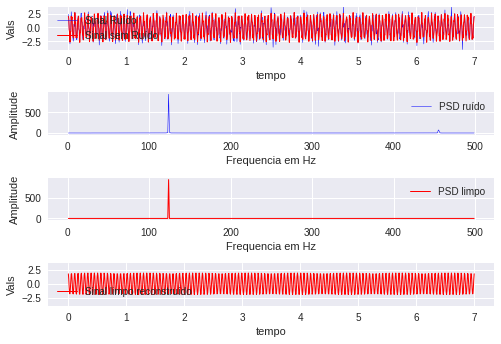

In [17]:
#plot

fig, ax = plt.subplots(4,1)
ax[0].plot(t, signal, color='b', lw=0.5, label='Sinal Ruído')
ax[0].plot(t, signal_clean, color='r', lw=1, label='Sinal sem Ruído')
ax[0].set_ylim([minsignal, maxsignal])
ax[0].set_xlabel('tempo')
ax[0].set_ylabel('Vals')
ax[0].legend()

ax[1].plot(freq[idxs_half], np.abs(psd[idxs_half]), color='b', lw=0.5, label='PSD ruído')
ax[1].set_xlabel('Frequencia em Hz')
ax[1].set_ylabel('Amplitude')
ax[1].legend()

ax[2].plot(freq[idxs_half], np.abs(psd_clean[idxs_half]), color='r', lw=1, label='PSD limpo')
ax[2].set_xlabel('Frequencia em Hz')
ax[2].set_ylabel('Amplitude')
ax[2].legend()

ax[3].plot(t, signal_filtered, color='r', lw=1, label='Sinal limpo reconstruído')
ax[3].set_ylim([minsignal, maxsignal])
ax[3].set_xlabel('tempo')
ax[3].set_ylabel('Vals')
ax[3].legend()

plt.subplots_adjust(hspace=1)

---

3) O arquivo sombaleia1.mat contém dados de áudio de uma vocalização de baleia
azul do Pacífico gravada por microfones submarinos ao longo da costa da
Califórnia. O arquivo sombaleia2.mat contem 2 trechos de áudio de vocalização
de uma baleia gravada na região da costa do Japão. Os cientistas suspeitam que
o som contido no arquivo sombaleia2.mat é proveniente da baleia azul. Dentro
do modulo scipy há uma função para leitura de arquivos .mat ( matlab datafile).
https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html

*Observações complementares: vocalização das baleias, os valores da frequência da amostragem estão dentro dos arquivos .mat. Segue as frequência de amostragem  de cada dado:
frequência de amostragem (California,sombaleia1.mat) = 4Khz
frequência de amostragem (Japão,sombaleia2.mat) = 64Khz*

a. Plote o gráfico do sinal em função do tempo do áudio proveniente do
arquivo sombaleia.mat e sombaleia2.mat.

In [2]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
os.chdir('/content/drive/My Drive/Graduação/Processamento/')

In [5]:
mat_sombaleia1 = sio.loadmat("sombaleia1")
mat_sombaleia2 = sio.loadmat("sombaleia2")

In [6]:
mat_sombaleia1

{'C': array([[ 0.015625 ],
        [ 0.03125  ],
        [ 0.015625 ],
        ...,
        [-0.015625 ],
        [-0.0078125],
        [ 0.       ]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Apr 25 13:39:32 2019',
 '__version__': '1.0',
 'fs_california': array([[4000]], dtype=uint16)}

In [7]:
mat_sombaleia2

{'Fs_japao': array([[64000]], dtype=uint16),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Apr 25 13:43:22 2019',
 '__version__': '1.0',
 'j': array([[0.01356769, 0.03456998, 0.02940881, ..., 0.01535428, 0.02345347,
         0.0183717 ]])}

In [8]:
sombaleia1 = mat_sombaleia1['C']

In [9]:
sombaleia1

array([[ 0.015625 ],
       [ 0.03125  ],
       [ 0.015625 ],
       ...,
       [-0.015625 ],
       [-0.0078125],
       [ 0.       ]])

In [10]:
sombaleia2 = mat_sombaleia2['j']

In [11]:
sombaleia2

array([[0.01356769, 0.03456998, 0.02940881, ..., 0.01535428, 0.02345347,
        0.0183717 ]])

In [12]:
sombaleia1 = list(map(lambda x: x[0], sombaleia1.tolist()))

In [13]:
sombaleia2 = sombaleia2.tolist() 
sombaleia2 = sombaleia2[0]

In [14]:
sombaleia1

[0.015625,
 0.03125,
 0.015625,
 -0.0078125,
 0.015625,
 0.015625,
 0.015625,
 0.0234375,
 0.0234375,
 0.015625,
 -0.0078125,
 0.0234375,
 0.015625,
 0.0390625,
 0.0390625,
 0.015625,
 0.0,
 0.015625,
 0.0,
 0.015625,
 0.0234375,
 0.0390625,
 0.0078125,
 0.0078125,
 -0.015625,
 0.0,
 -0.0078125,
 0.0078125,
 0.046875,
 0.03125,
 0.0234375,
 -0.015625,
 -0.015625,
 0.03125,
 0.0390625,
 0.0234375,
 0.0234375,
 -0.0078125,
 0.0,
 0.015625,
 0.0234375,
 0.015625,
 -0.0078125,
 -0.0078125,
 -0.0078125,
 0.0,
 0.0234375,
 0.03125,
 0.03125,
 0.0234375,
 0.0,
 -0.0078125,
 0.0,
 0.0078125,
 0.015625,
 0.0078125,
 0.03125,
 -0.0078125,
 0.03125,
 0.0078125,
 0.0,
 0.0234375,
 0.0078125,
 0.015625,
 -0.0234375,
 -0.015625,
 0.0078125,
 0.03125,
 0.0,
 -0.0078125,
 -0.0078125,
 0.0078125,
 -0.0078125,
 0.03125,
 0.0,
 0.0,
 0.015625,
 0.0234375,
 0.0078125,
 0.0078125,
 -0.015625,
 -0.0078125,
 0.015625,
 -0.0234375,
 0.015625,
 -0.0234375,
 -0.0078125,
 0.0,
 0.03125,
 0.0,
 -0.0234375,
 0.007

In [15]:
sombaleia2

[0.013567686080932617,
 0.03456997871398926,
 0.029408812522888184,
 0.015274882316589355,
 0.023890256881713867,
 0.017418861389160156,
 0.004277467727661133,
 0.011622309684753418,
 -0.001320481300354004,
 -0.013548612594604492,
 0.004833340644836426,
 0.003205537796020508,
 -0.005171537399291992,
 0.009200572967529297,
 0.008208036422729492,
 -0.001042485237121582,
 0.010113716125488281,
 0.006024360656738281,
 -0.010015130043029785,
 -0.0008440017700195312,
 -0.003265857696533203,
 -0.010054826736450195,
 0.011503219604492188,
 0.013805985450744629,
 0.009756326675415039,
 0.023334383964538574,
 0.012972235679626465,
 0.0039598941802978516,
 0.01579105854034424,
 0.0077315568923950195,
 0.005150914192199707,
 0.03254520893096924,
 0.03512585163116455,
 0.018689274787902832,
 0.025001883506774902,
 0.02218306064605713,
 0.011185646057128906,
 0.015076398849487305,
 0.0018954277038574219,
 -0.010332822799682617,
 -0.00012934207916259766,
 -0.002948284149169922,
 -0.001439571380615234

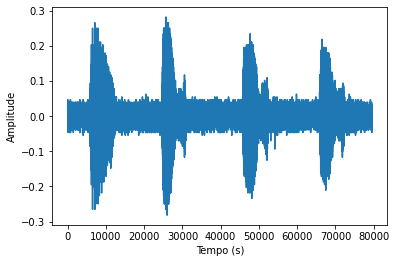

In [18]:
#plot
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.plot(sombaleia1)

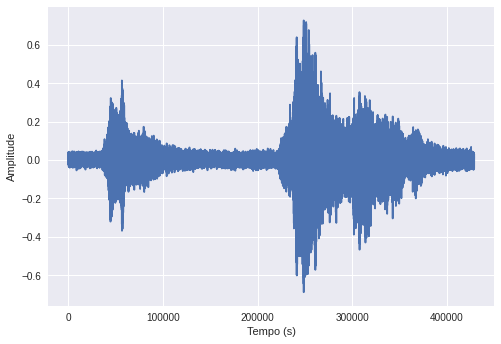

In [33]:
#plot
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.plot(sombaleia2)

b. Aplique a transformada de Fourier de cada som. plote os gráficos de
magnitude em KHz para o intervalo de 0 até 8 kHz. Dica: utilize o camando
plt.xlim([0 8000]).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

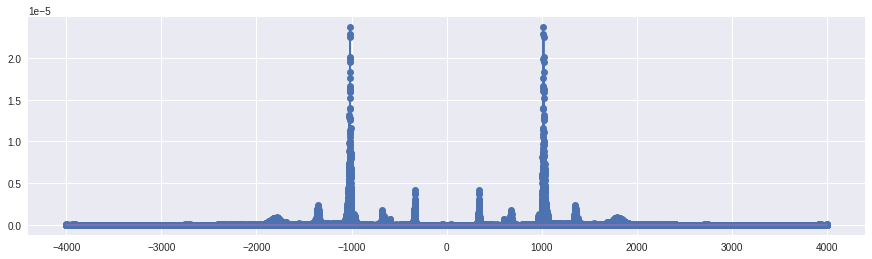

In [34]:
fs = 4000
tinicial = 0
tfinal = len(sombaleia1)

#tempo
t = np.linspace(tinicial, tfinal, fs)

yfft = np.fft.fftshift(np.fft.fft(sombaleia1))
freq = np.arange(0,fs,fs/yfft.shape[0])-fs/2
plt.figure(figsize=(15,4))
plt.stem(freq,(2*np.abs(yfft)/yfft.shape[0])**2)

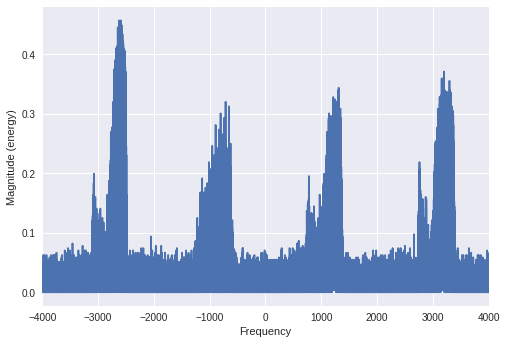

In [49]:
plt.magnitude_spectrum(yfft, Fs=8000) 
plt.xlim([-4000, 4000])
plt.show() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

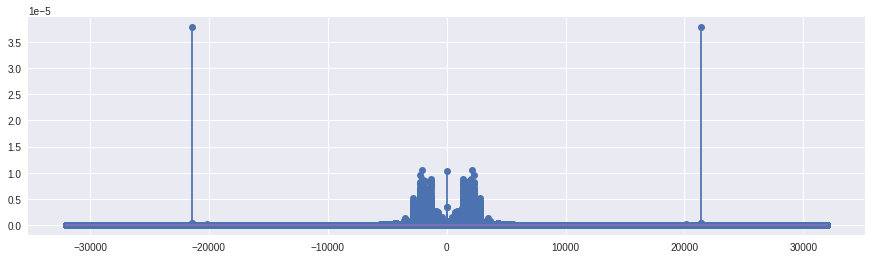

In [50]:
fs = 64000
tinicial = 0
tfinal = len(sombaleia2)

#tempo
t = np.linspace(tinicial, tfinal, fs)

yfft2 = np.fft.fftshift(np.fft.fft(sombaleia2))
freq = np.arange(0,fs,fs/yfft2.shape[0])-fs/2
plt.figure(figsize=(15,4))
plt.stem(freq,(2*np.abs(yfft2)/yfft2.shape[0])**2)

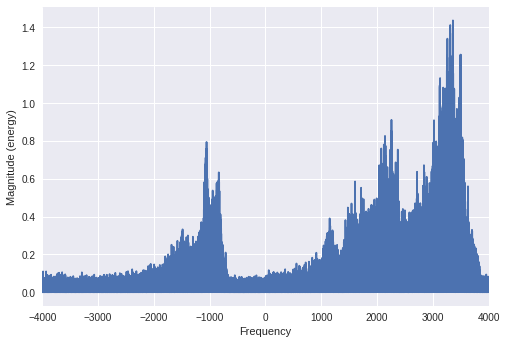

In [52]:
plt.magnitude_spectrum(yfft2, Fs=8000) 
plt.xlim([-4000, 4000])
plt.show()

c. Separe os sons encontrados em novas variáveis C1, C2, C3, .... e j1 , j2 e
Faça a transformada de Fourier de cada som separadamente. gere um
gráfico de subplot com suas magnitudes.

Observação complementar: plotar o gráfico da magnitude em Khz no intervalo de 0 até a frequencia de nyquist. Desconsiderar a frequencia limite de 8Khz descrita na lista 2 neste item.

In [47]:
C1 = sombaleia1[6000:14000]
C2 = sombaleia1[24000:32000]
C3 = sombaleia1[45000:53000]
C4 = sombaleia1[65000:73000]
J1 = sombaleia2[30000:80000]
J2 = sombaleia2[220000:320000]

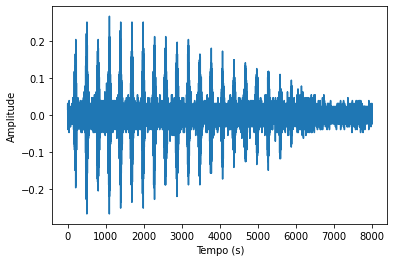

In [34]:
#plot
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.plot(C1)

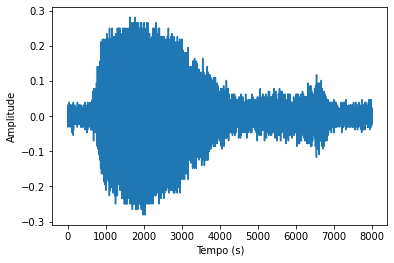

In [35]:
#plot
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.plot(C2)

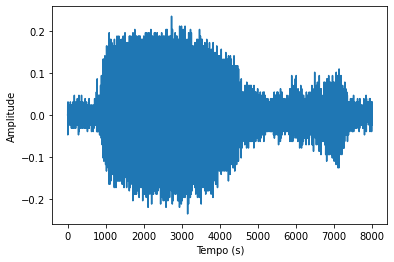

In [36]:
#plot
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.plot(C3)

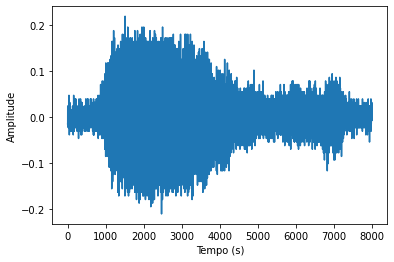

In [37]:
#plot
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.plot(C4)

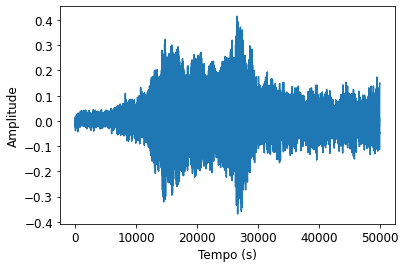

In [45]:
#plot
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.plot(J1)

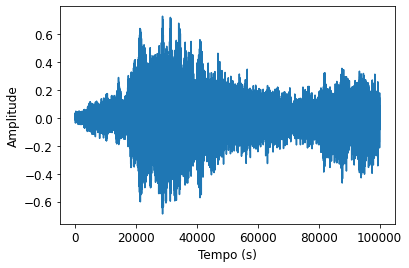

In [44]:
#plot
plt.ylabel("Amplitude")
plt.xlabel("Tempo (s)")
plt.plot(J2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

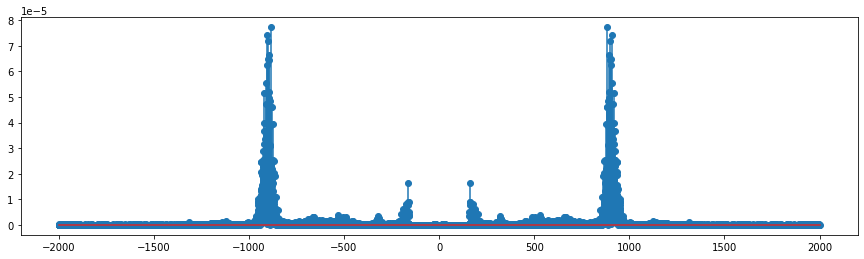

In [50]:
fs = 4000
tinicial = 0
tfinal = len(C1)

#tempo
t = np.linspace(tinicial, tfinal, fs)

yfftC1 = np.fft.fftshift(np.fft.fft(C1))
freq = np.arange(0,fs,fs/yfftC1.shape[0])-fs/2
plt.figure(figsize=(15,4))
plt.stem(freq,(2*np.abs(yfftC1)/yfftC1.shape[0])**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

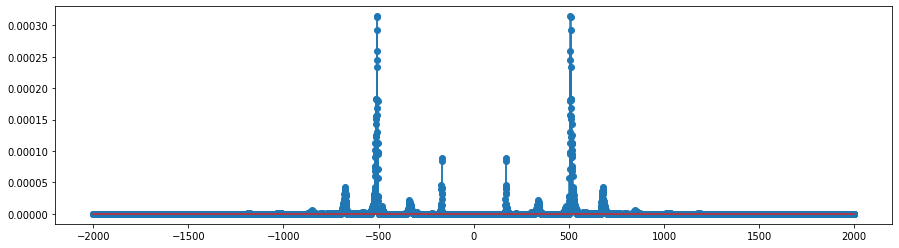

In [51]:
fs = 4000
tinicial = 0
tfinal = len(C2)

#tempo
t = np.linspace(tinicial, tfinal, fs)

yfftC2 = np.fft.fftshift(np.fft.fft(C2))
freq = np.arange(0,fs,fs/yfftC2.shape[0])-fs/2
plt.figure(figsize=(15,4))
plt.stem(freq,(2*np.abs(yfftC2)/yfftC2.shape[0])**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

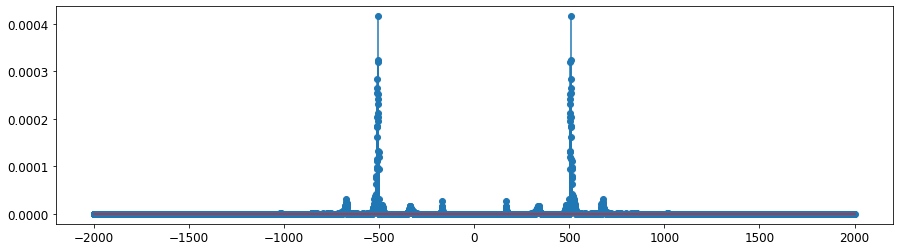

In [43]:
fs = 4000
tinicial = 0
tfinal = len(C3)

#tempo
t = np.linspace(tinicial, tfinal, fs)

yfftC3 = np.fft.fftshift(np.fft.fft(C3))
freq = np.arange(0,fs,fs/yfftC3.shape[0])-fs/2
plt.figure(figsize=(15,4))
plt.stem(freq,(2*np.abs(yfftC3)/yfftC3.shape[0])**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

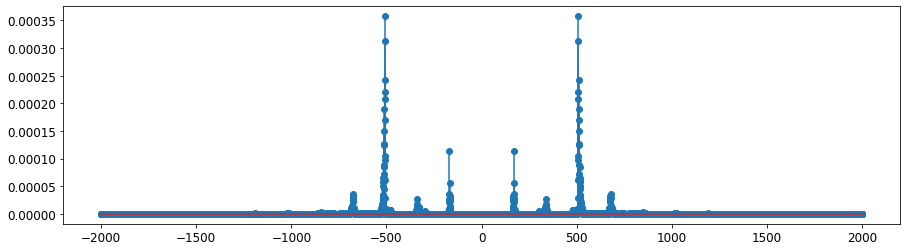

In [42]:
fs = 4000
tinicial = 0
tfinal = len(C4)

#tempo
t = np.linspace(tinicial, tfinal, fs)

yfftC4 = np.fft.fftshift(np.fft.fft(C4))
freq = np.arange(0,fs,fs/yfftC4.shape[0])-fs/2
plt.figure(figsize=(15,4))
plt.stem(freq,(2*np.abs(yfftC4)/yfftC4.shape[0])**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

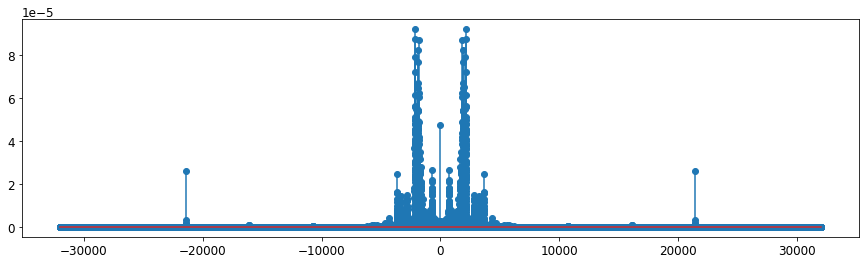

In [41]:
fs = 64000
tinicial = 0
tfinal = len(J1)

#tempo
t = np.linspace(tinicial, tfinal, fs)

yfftJ1 = np.fft.fftshift(np.fft.fft(J1))
freq = np.arange(0,fs,fs/yfftJ1.shape[0])-fs/2
plt.figure(figsize=(15,4))
plt.stem(freq,(2*np.abs(yfftJ1)/yfftJ1.shape[0])**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


<StemContainer object of 3 artists>

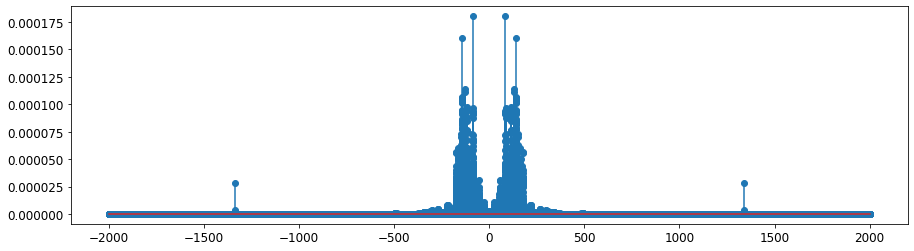

In [40]:
fs = 4000
tinicial = 0
tfinal = len(J2)

#tempo
t = np.linspace(tinicial, tfinal, fs)

yfftJ2 = np.fft.fftshift(np.fft.fft(J2))
freq = np.arange(0,fs,fs/yfftJ2.shape[0])-fs/2
plt.figure(figsize=(15,4))
plt.stem(freq,(2*np.abs(yfftJ2)/yfftJ2.shape[0])**2)

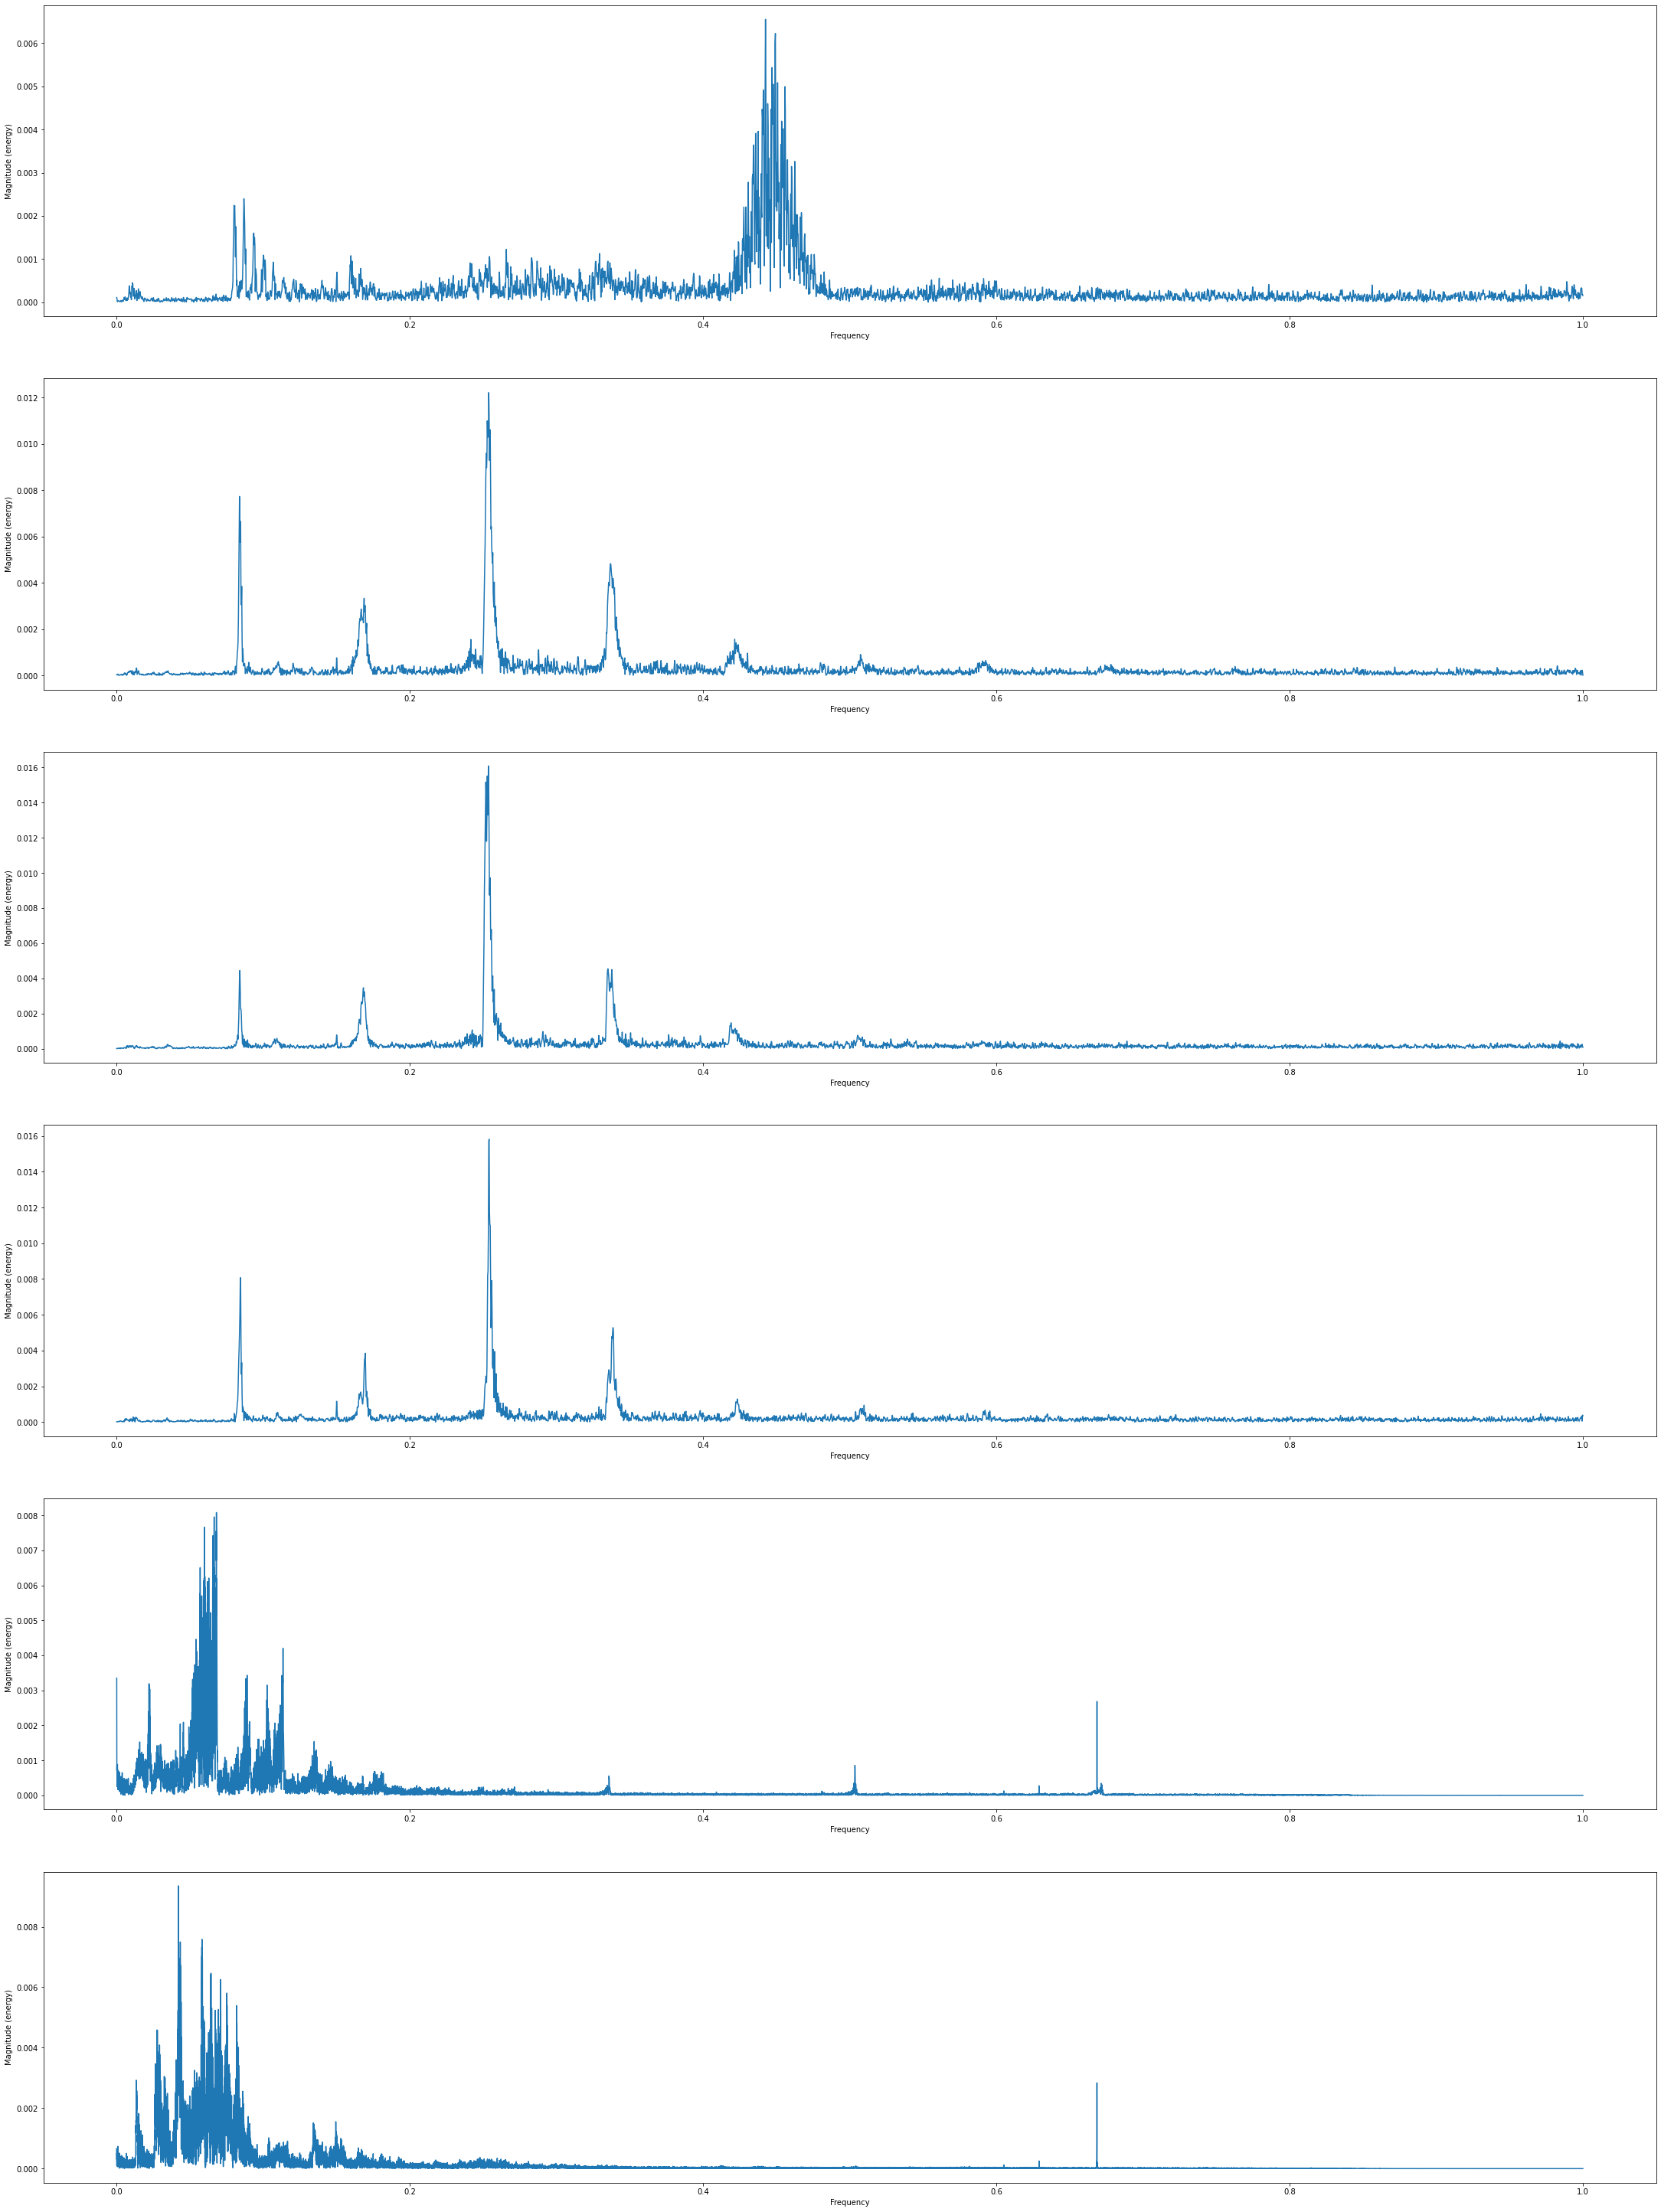

In [39]:
#plot

fig, ax = plt.subplots(6,1)

ax[0].magnitude_spectrum(C1)

ax[1].magnitude_spectrum(C2)

ax[2].magnitude_spectrum(C3)

ax[3].magnitude_spectrum(C4)

ax[4].magnitude_spectrum(J1)

ax[5].magnitude_spectrum(J2)

plt.rcParams.update({'font.size': 12})
plt.subplots_adjust(right = 5, top=10)

d. Discuta se os sons registrados na costa do Japão são provenientes da
espécie baleia azul encontrada na Califórnia.

Olhando para a resposta em frequencia dos sinais e, principalmente, dos seus recortes. Vemos que há pouca semelhança entre os sons registrados na Califórnia e os sons registrados no Japão. Dos recortes da Califórnia C2. C3 e C4 e do Japão J1 e J2, vemos semelhança dentre as próprias amostras dos recortes. O que faz sentido, tendo em vista a proximidade. Curiosamente, na California, o recorte C1 possia característica diferenciadas, podendo ser um outra espécia ou uma outra fonte sonora.

No handles with labels found to put in legend.


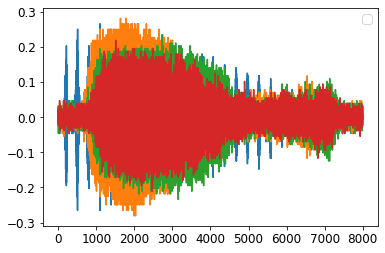

In [54]:
plt.plot(C1)
plt.plot(C2)
plt.plot(C3)
plt.plot(C4)

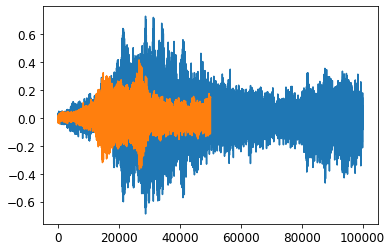

In [56]:
plt.plot(J2)
plt.plot(J1)

-----